<a href="https://colab.research.google.com/github/prerna-roy/credit_card_fraud/blob/main/final_credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
Credit card fraud is an financial fraud that occasionally occurs. It happens when an unauthorised individual gains access to an individual's credit card information in order to make fraudulent purchases and transactions. The effects of credit card fraud can be devastating for people, especially if large amounts of money were spent. Credit card fraud often happens when a card is lost or stolen, or through phishing and scamming schemes. It can even happen through hacking, or websites that seem trustworthy but end up being malicious. 

### Purpose
It is clear that financial institutions need to create highly accurate systems in order to prevent credit card fraud and protect their customer base financial information. Thus, the goal of this project is to use [synthetic credit card fraud data](https://www.kaggle.com/datasets/aitude/ctgan-synthetic-credit-card-fraud-dataset) to build an accurate classification model that can determine whether a transaction is fradulent or not. This model is then applied to the original credit card fraud dataset, [a well-known publicly-available dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) that only contains 492 fradulent transactions out of a total of 284,807 transactions made by European cardholders in September 2013. The aim is to create a generalisable model that can be used on this highly imbalanced dataset to accurately determine which transactions were fraudulent.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

### Exploratory Data Analysis 

In [ ]:
syn_df = pd.read_csv("/content/drive/MyDrive/ftds_project_2/data/ctgan_data.csv")

In [ ]:
syn_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,131196.0,-1.829267,-4.014357,-3.500898,4.132251,-0.184280,-4.549442,-1.763961,0.581823,-1.333723,...,1.426045,-0.674371,0.405865,0.233265,-0.677015,0.113999,0.193479,0.147068,7.39,1
1,128997.0,1.275073,-0.811653,-2.077238,0.391131,0.617316,-1.100701,0.058033,-0.195165,0.827303,...,-0.405946,-0.949178,0.063598,-0.454418,0.008721,-0.235292,-0.140436,-0.083795,548.18,1
2,23228.0,-6.486806,12.316680,-0.159296,-1.476325,-10.551318,-3.196821,-2.080644,-0.827171,-7.218656,...,0.888168,2.096058,2.448951,-1.100272,-1.731948,-0.056348,-0.793049,-0.760746,0.00,1
3,168479.0,-0.620168,0.179171,0.051435,-0.549703,0.466674,-0.853331,0.158395,-0.086357,-0.653450,...,-0.405259,-0.024038,0.355619,0.494179,-0.364062,0.691354,-0.485278,0.115025,102.78,0
4,47788.0,1.226141,0.685769,-3.269819,4.044547,5.398091,-1.625797,0.566105,0.430564,-0.616791,...,-0.154688,-0.763524,-0.130603,-1.026025,1.756225,0.803660,0.350295,0.285944,6.35,1


In [ ]:
syn_df.info() 
# Time is number of seconds elapsed between this transaction and the first transaction
# V1 - V28 are 'masked' variables in order to protect the identity/information of the customers. They have
# undergone PCA and the values are not the original values of the dataset.
# Amount is the amount of money spent in that transaction 
# Class 1 = fraudulent transaction, Class 0 = real transaction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
syn_df.loc[syn_df.duplicated() == True] #no duplicated values 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
syn_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
syn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,90612.899988,47249.332265,0.000000,50520.000000,82091.000000,136572.000000,172792.000000
V1,284807.0,-1.231740,3.675312,-18.336919,-1.919930,-0.422970,1.164033,2.454087
V2,284807.0,1.427346,2.829019,-18.544554,-0.121423,0.602685,2.170688,13.508542
V3,284807.0,-1.400495,2.676741,-9.154794,-2.930170,-0.733580,0.593717,3.923432
V4,284807.0,1.666286,2.687045,-5.683171,-0.307914,0.968860,3.391439,15.160001
V5,284807.0,-1.044619,3.162108,-18.998640,-1.324306,-0.394581,0.477143,9.872112
V6,284807.0,-0.706651,1.736378,-7.948529,-1.232124,-0.611581,0.004476,7.312835
V7,284807.0,-1.348656,2.856984,-11.413642,-1.882710,-0.388360,0.306388,11.435091
V8,284807.0,0.203586,2.459683,-12.420579,-0.238265,0.090593,0.577302,12.741546
V9,284807.0,-0.932437,1.990228,-9.404776,-1.616980,-0.533084,0.240282,8.904668


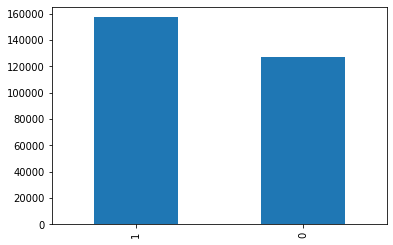

In [ ]:
syn_df.Class.value_counts().plot(kind='bar') #1 is fraud, 0 is real

In [ ]:
syn_df.describe() #summary statistics of each variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,90612.899988,-1.231740,1.427346,-1.400495,1.666286,-1.044619,-0.706651,-1.348656,0.203586,-0.932437,...,0.457746,0.073594,0.084949,0.030677,0.069420,0.007219,0.087473,0.034508,96.094714,0.552244
std,47249.332265,3.675312,2.829019,2.676741,2.687045,3.162108,1.736378,2.856984,2.459683,1.990228,...,1.844141,0.878541,0.678345,0.574966,0.632164,0.482730,0.782960,0.361277,199.829114,0.497264
min,0.000000,-18.336919,-18.544554,-9.154794,-5.683171,-18.998640,-7.948529,-11.413642,-12.420579,-9.404776,...,-15.337072,-8.136080,-5.580203,-2.079315,-4.604512,-1.744495,-4.989467,-2.557544,0.000000,0.000000
25%,50520.000000,-1.919930,-0.121423,-2.930170,-0.307914,-1.324306,-1.232124,-1.882710,-0.238265,-1.616980,...,-0.185141,-0.541150,-0.153052,-0.347265,-0.316281,-0.323606,-0.081243,-0.070265,4.150000,0.000000
50%,82091.000000,-0.422970,0.602685,-0.733580,0.968860,-0.394581,-0.611581,-0.388360,0.090593,-0.533084,...,0.085322,0.116023,0.008502,0.063463,0.068936,-0.060122,0.018283,0.023510,21.030000,1.000000
75%,136572.000000,1.164033,2.170688,0.593717,3.391439,0.477143,0.004476,0.306388,0.577302,0.240282,...,0.460937,0.630634,0.195974,0.477340,0.469275,0.281239,0.304141,0.180580,91.980000,1.000000
max,172792.000000,2.454087,13.508542,3.923432,15.160001,9.872112,7.312835,11.435091,12.741546,8.904668,...,18.887294,7.924848,9.201686,1.277876,4.923670,3.517346,3.730047,1.999286,1638.150000,1.000000


At first glance of the data, we derive the following insights:
* There are more fraudulent data points than real transactions. This is synthesised data and not the original, created for the purposes of better training, which may be the reason why there are more fraudulent transactions than real ones.
* There are no duplicated data values, and no null or missing values. 
* The distributions of all 30 independent variables are quite large in range, and could potentially have very skewed or non-Gaussian distributions.



In [ ]:
syn_df['Class'] = syn_df['Class'].astype('object')
col_names = syn_df.columns.tolist()
col_names.pop()
print(col_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

cols = list(chunks(col_names, 5))
cols #change shape of column list to make plotting easier

[['Time', 'V1', 'V2', 'V3', 'V4'],
 ['V5', 'V6', 'V7', 'V8', 'V9'],
 ['V10', 'V11', 'V12', 'V13', 'V14'],
 ['V15', 'V16', 'V17', 'V18', 'V19'],
 ['V20', 'V21', 'V22', 'V23', 'V24'],
 ['V25', 'V26', 'V27', 'V28', 'Amount']]

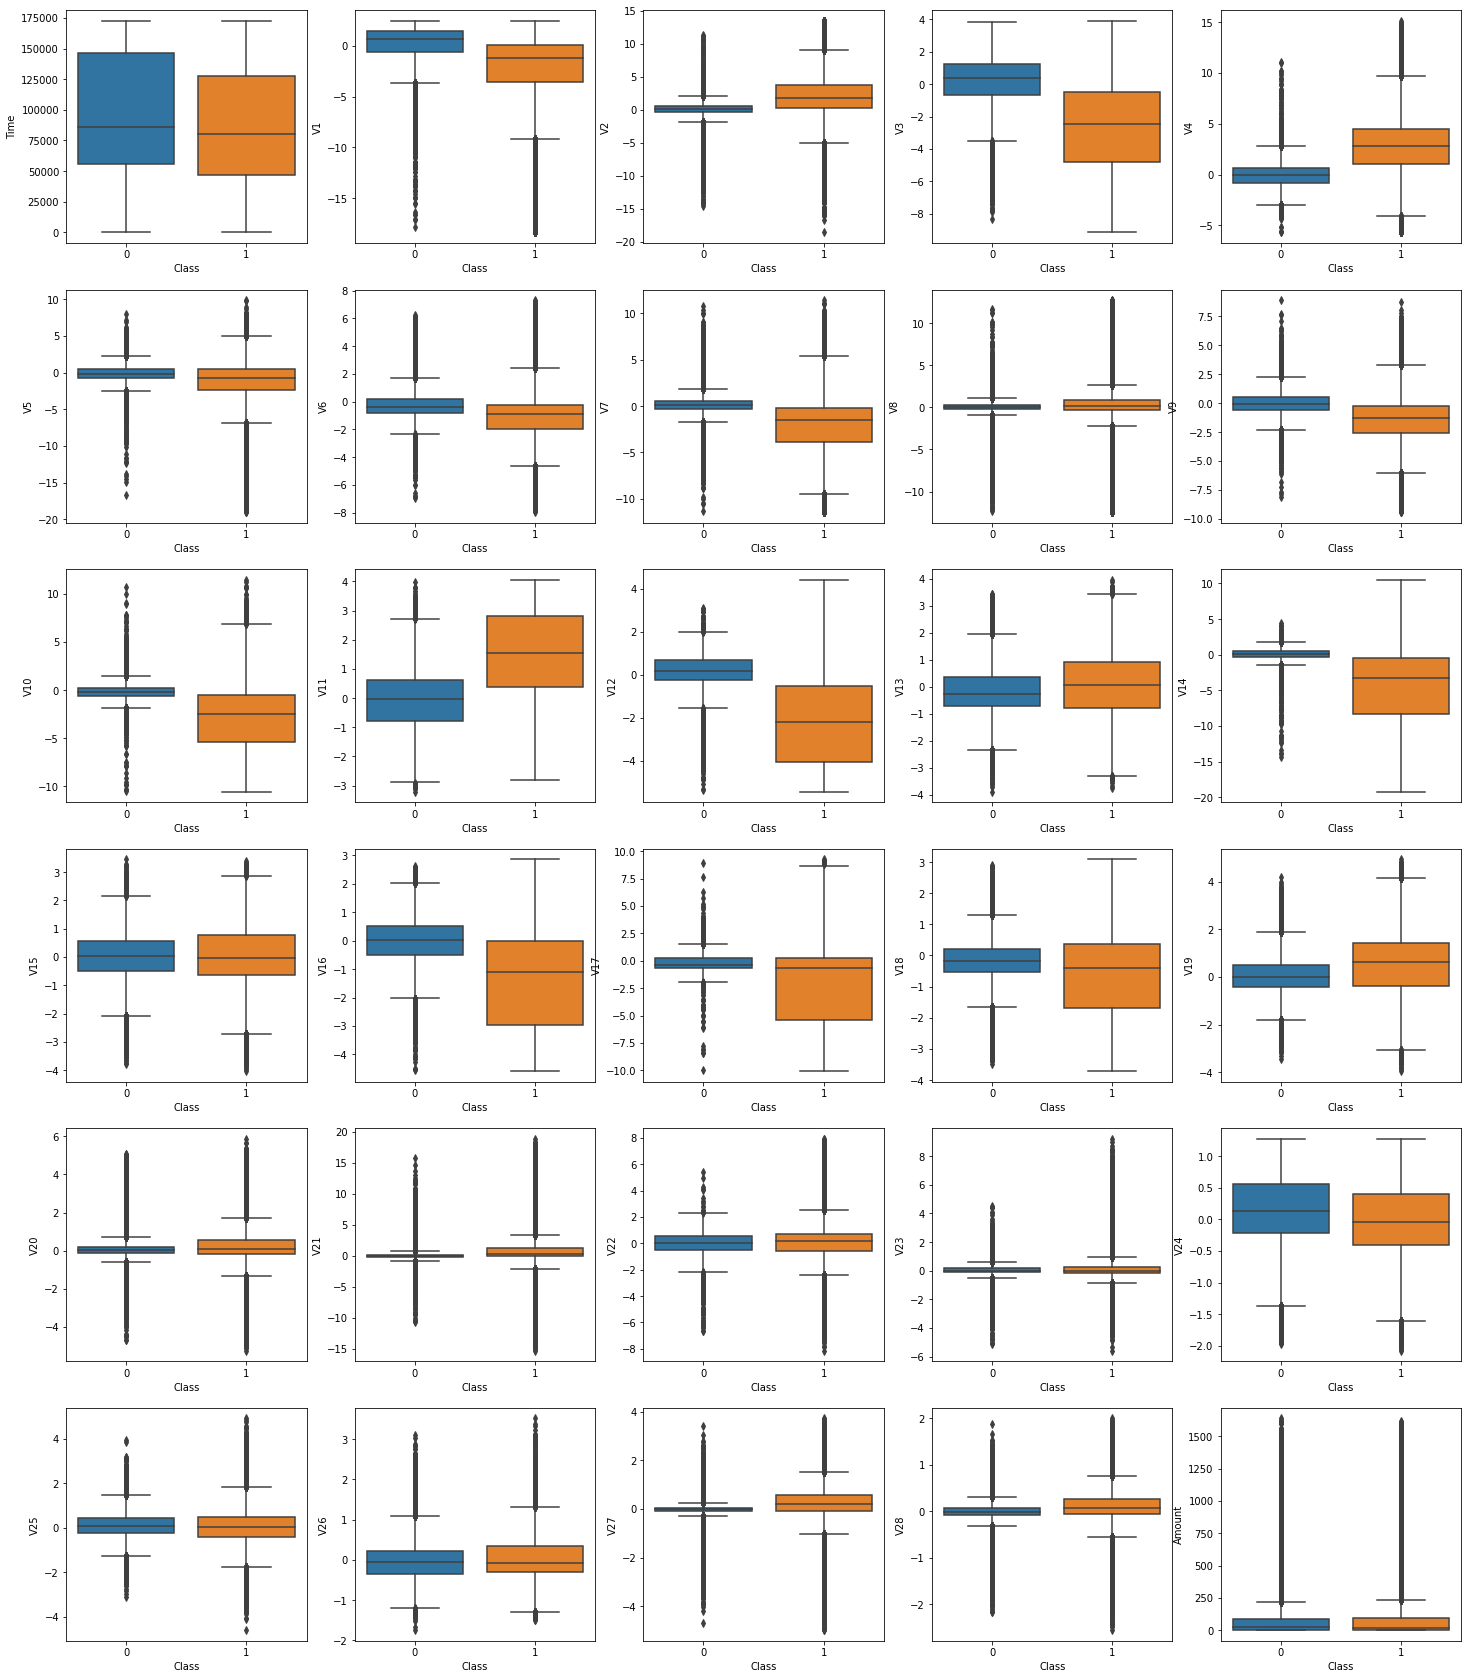

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25,30))
for r in range(0,6):
    for c in range(0,5):
        sns.boxplot(data=syn_df, x='Class', y=cols[r][c], ax=axes[r][c])

# There are many outliers in the dataset across the many variables. Check the distributions for each of these variables next.

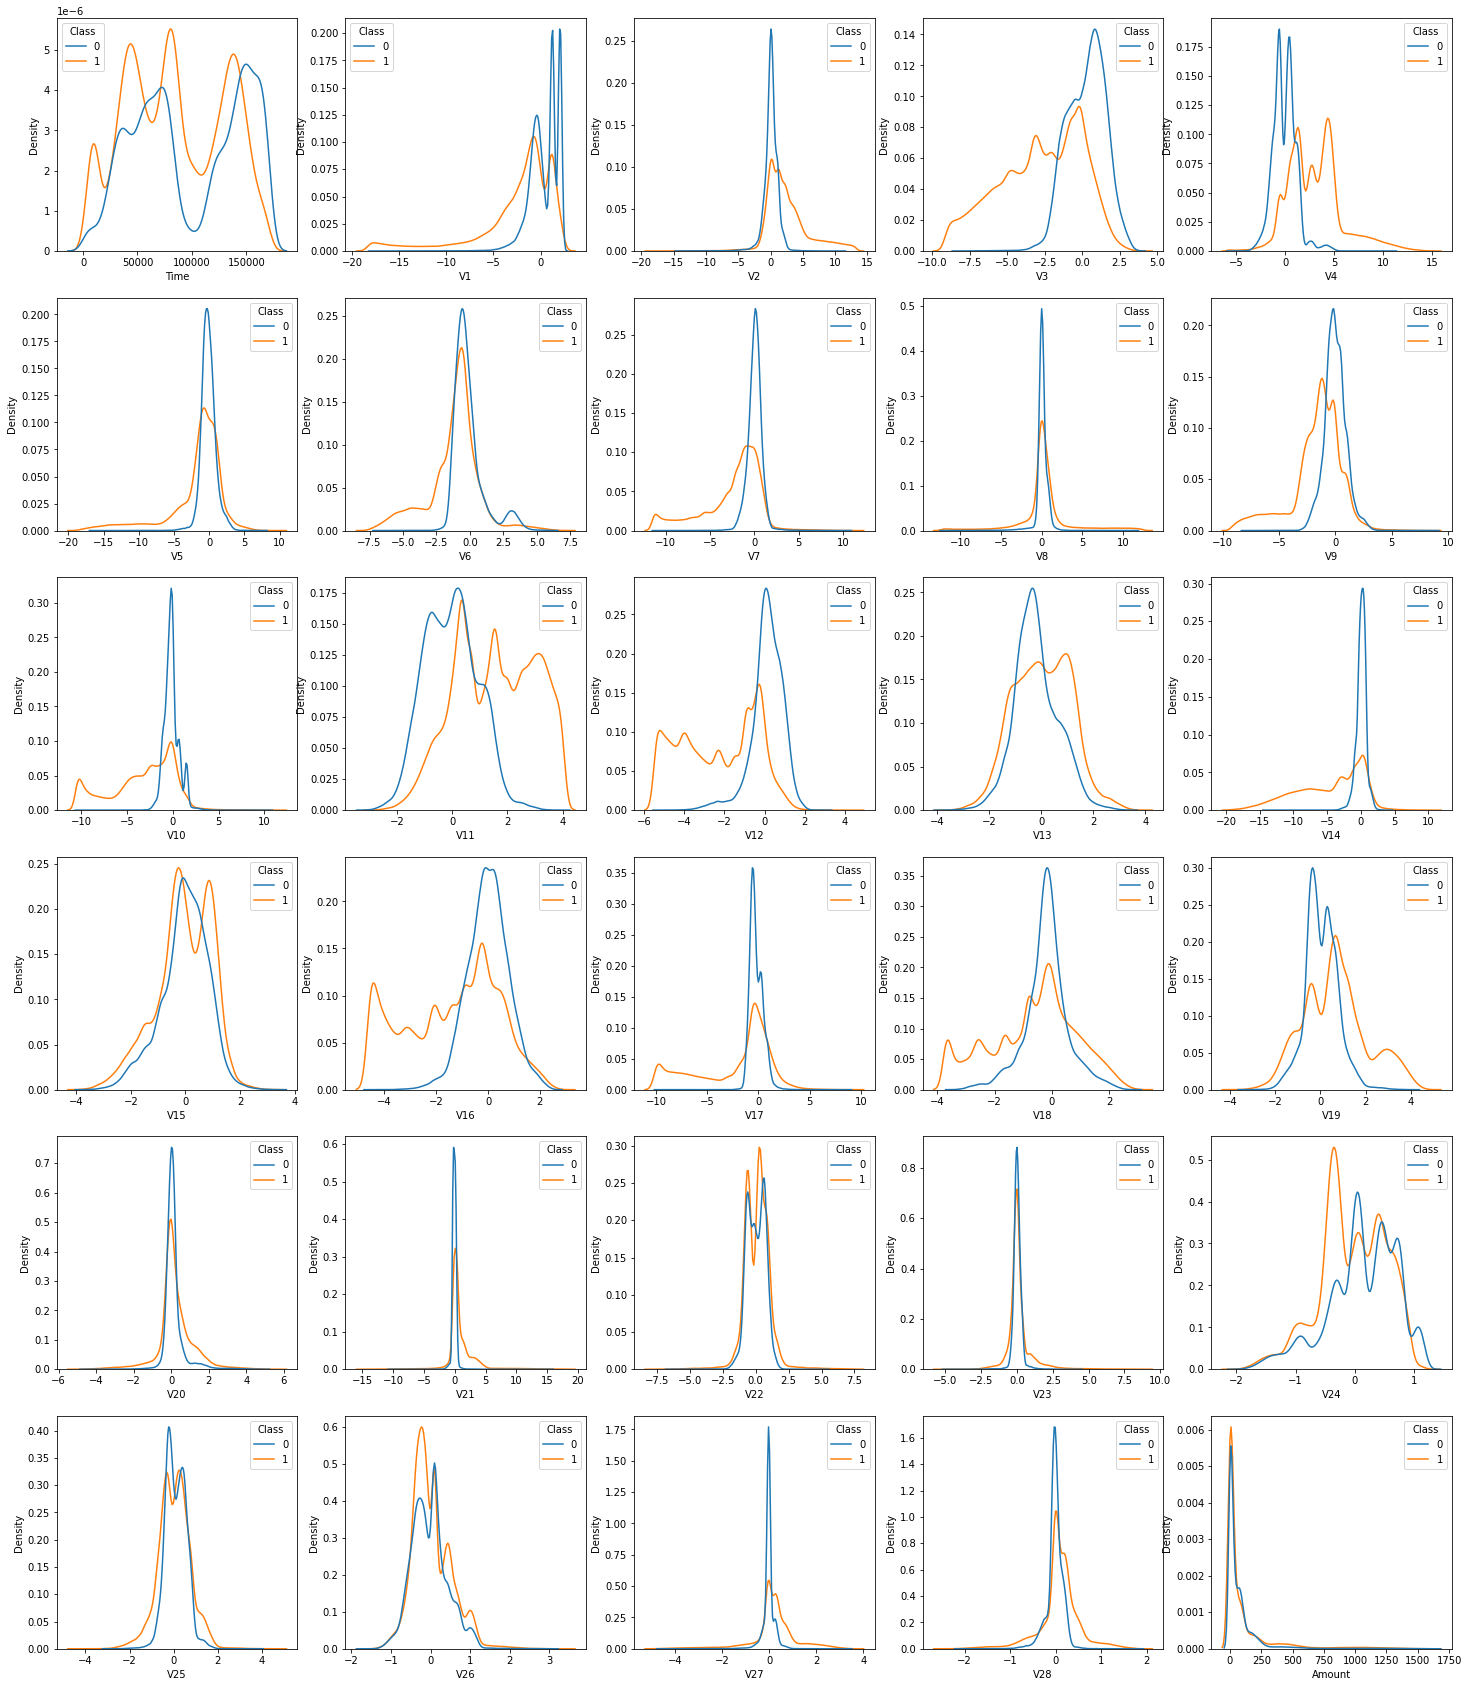

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25,30))
for r in range(0,6):
    for c in range(0,5):
        sns.kdeplot(data=syn_df, x=cols[r][c], hue='Class', ax=axes[r][c])

# Some of the distributions are not normally distributed - Time in particular seems to separate into different segments. 

We can see by checking the distributions of the 30 independent variables that there are significant numbers of outliers in the dataset, as well as varied distributions. Only a few of the variables have a normal/Gaussian distribution. Interestingly, the distributions for both classes seem to have some level of separability for certain variables (for example, in V10, V3, V7, V16, V12, and V14). However, most of the independent variables have both the fraudulent and real transaction classes overalapped.

In [ ]:
syn_df['Class'] = syn_df['Class'].astype('int') 
#in order to do correlation analysis, data type must be numerical

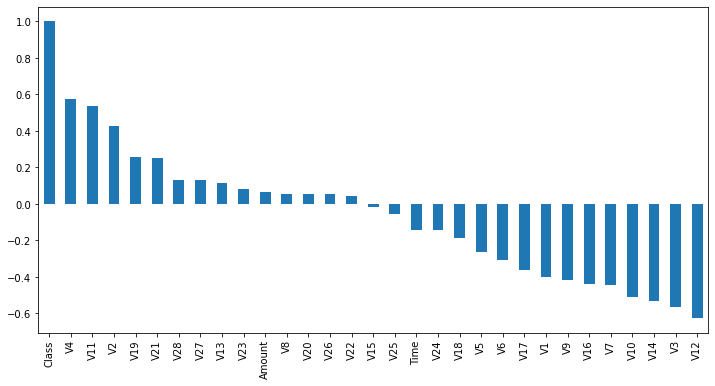

In [ ]:
syn_df.corr()['Class'].sort_values(ascending = False).plot(kind='bar', figsize=(12,6))

Insights: the variables V4, V11, and V2 are important variables that are positively correlated with fraudulent credit card transactions. 

This means an increase in these variables will lead to a higher likelihood that the transaction was fraudulent On the other hand, V12, V3, V14, and V10 are important variables that are negatively correlated with fradulent credit card transactions. An increase in these variables mean the transaction is less likely to be fraudulent. The distributions that were more separated are also the distributions that correlated least with fraudulent transactions.

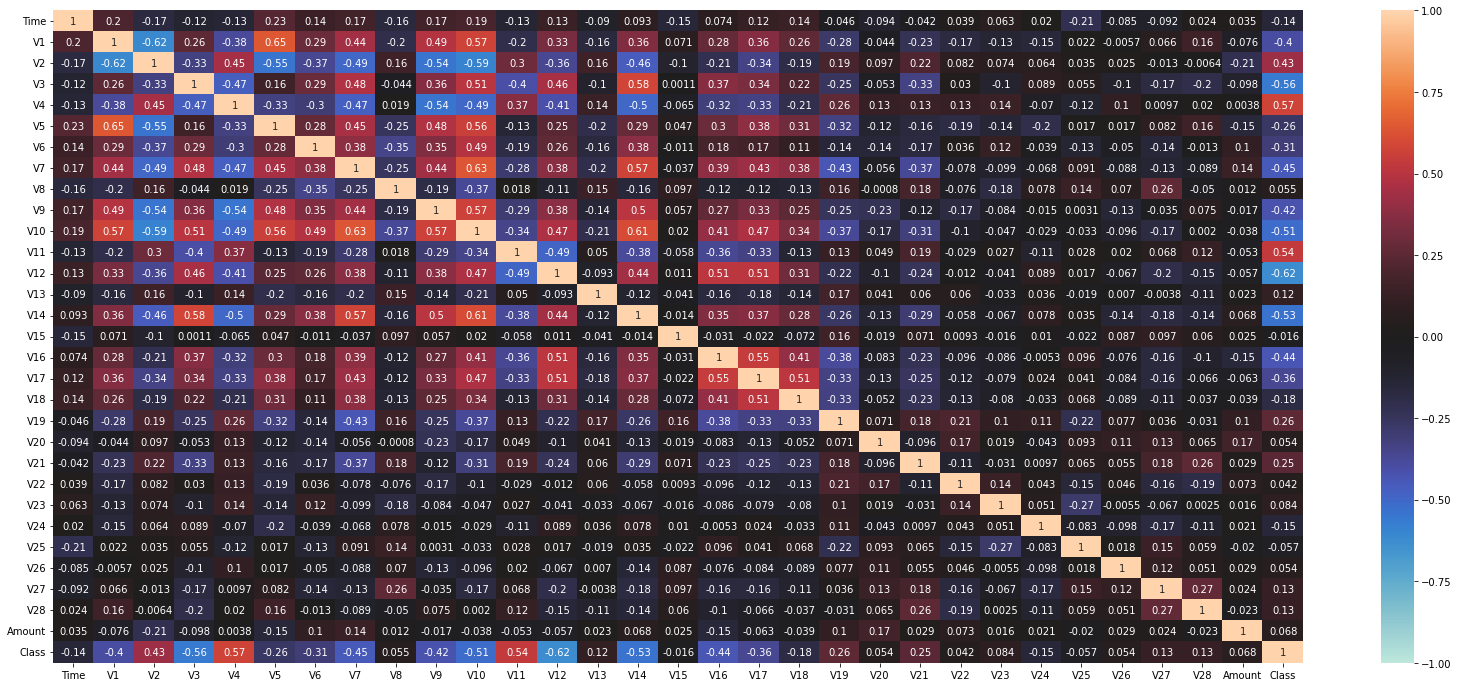

In [ ]:
fig, ax = plt.subplots(1, figsize=(28,12))
ax = sns.heatmap(syn_df.corr(), vmin=-1, vmax=1, center=0, annot=True)

The findings of the previous bar graph can be re-confirmed here. Observe the variables that positively correlated strongly to fraudulent transactions, such as V4 and V11. Additionally, there are the variables that negatively correlated to fraudulent classes, such as V12 and V10.

### Training Different Models

In [ ]:
# Get X and y into seperate arrays
X = syn_df.iloc[:, :-1].values
y = syn_df.Class.values

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

213605 71202 213605 71202


In [ ]:
#Feature Scaling 
sc = StandardScaler()
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

In [ ]:
#Check the summary statistics of the features
X_train_transformed = pd.DataFrame(X_train)
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
0,213605.0,-8.607146e-17,1.000002,-1.917758,-0.849056,-0.180281,0.973192,1.737781
1,213605.0,-1.745878e-16,1.000002,-4.652711,-0.186850,0.220286,0.651112,1.001641
2,213605.0,8.839397e-15,1.000002,-7.055765,-0.546155,-0.291942,0.261042,4.270299
3,213605.0,-7.277570e-16,1.000002,-2.902092,-0.571318,0.249009,0.745046,1.990878
4,213605.0,2.464255e-15,1.000002,-2.734328,-0.735155,-0.258984,0.640206,5.025197
5,213605.0,2.598693e-15,1.000002,-5.667194,-0.088122,0.205757,0.480707,3.448060
6,213605.0,7.568966e-16,1.000002,-4.176150,-0.302751,0.053532,0.409422,4.622688
7,213605.0,1.918354e-16,1.000002,-3.529040,-0.187155,0.335336,0.578310,4.478256
8,213605.0,1.156368e-15,1.000002,-5.123993,-0.178414,-0.045020,0.152880,5.091531
9,213605.0,-3.801880e-15,1.000002,-4.260331,-0.343192,0.200266,0.588953,4.942675


In [ ]:
#Quick evaluation function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

### KNN Classifier

In [ ]:
#Calling the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Getting the model predictions
y_pred_knn = knn.predict(X_test)

Accuracy is: 92.0929187382377
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     31881
           1       0.98      0.88      0.92     39321

    accuracy                           0.92     71202
   macro avg       0.92      0.93      0.92     71202
weighted avg       0.93      0.92      0.92     71202

Precision is: 0.9791779263262694
Recall is: 0.8754355179166349


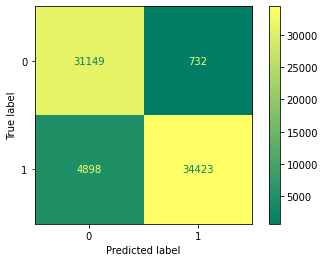

In [ ]:
# KNN Classification Results
knn_result = accuracy_score(y_test, y_pred_knn)
print('Accuracy is:', knn_result*100)
print(classification_report(y_test, y_pred_knn))
print('Precision is:', precision_score(y_test, y_pred_knn))
print('Recall is:', recall_score(y_test, y_pred_knn))
# print(confusion_matrix(y_test, y_pred_knn, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='summer')

### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Decision Tree Classifier Predictions
y_pred_dt = dt.predict(X_test)

Accuracy is: 91.76427628437403
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     31881
           1       0.93      0.93      0.93     39321

    accuracy                           0.92     71202
   macro avg       0.92      0.92      0.92     71202
weighted avg       0.92      0.92      0.92     71202

Precision is: 0.925477528804334
Recall is: 0.9253833829251545


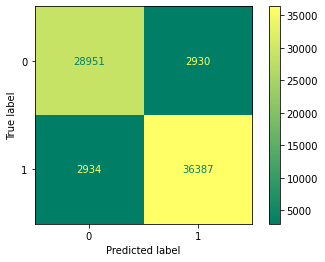

In [ ]:
# Decision Tree Classification Results
dt_result = accuracy_score(y_test, y_pred_dt)
print('Accuracy is:', dt_result*100)
print(classification_report(y_test, y_pred_dt))
print('Precision is:', precision_score(y_test, y_pred_dt))
print('Recall is:', recall_score(y_test, y_pred_dt))
# print(confusion_matrix(y_test, y_pred_dt, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='summer')

### Random Forest Classifier 

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Random Forest Classifier Predictions
y_pred_rf = rf.predict(X_test)

Accuracy is: 95.60124715597877
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     31881
           1       0.97      0.95      0.96     39321

    accuracy                           0.96     71202
   macro avg       0.95      0.96      0.96     71202
weighted avg       0.96      0.96      0.96     71202

Precision is: 0.9691462055018278
Recall is: 0.9506116324610259


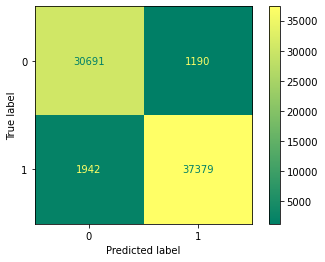

In [ ]:
# Random Forest Classification Results
rf_result = accuracy_score(y_test, y_pred_rf)
print('Accuracy is:', rf_result*100)
print(classification_report(y_test, y_pred_rf))
print('Precision is:', precision_score(y_test, y_pred_rf))
print('Recall is:', recall_score(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='summer')

### XGBoost Model

In [ ]:
import xgboost as xgb
kfold = KFold(n_splits=10)
xgbm = xgb.XGBClassifier(n_estimators=500, random_state=42)

In [ ]:
xgbm.fit(X_train, y_train)
y_pred_xgbm = xgbm.predict(X_test)

Accuracy is: 96.50571613156934
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     31881
           1       0.98      0.96      0.97     39321

    accuracy                           0.97     71202
   macro avg       0.96      0.97      0.96     71202
weighted avg       0.97      0.97      0.97     71202

Precision is: 0.9753749257892156
Recall is: 0.9609877673507795


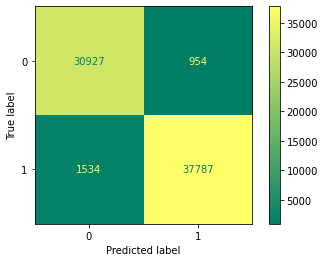

In [ ]:
# XGBoost Classification Results
xgbm_result = accuracy_score(y_test, y_pred_xgbm)
print('Accuracy is:', xgbm_result*100)
print(classification_report(y_test, y_pred_xgbm))
print('Precision is:', precision_score(y_test, y_pred_xgbm))
print('Recall is:', recall_score(y_test, y_pred_xgbm))
# print(confusion_matrix(y_test, y_pred_xgbm, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgbm, cmap='summer')

In [ ]:
xgbm_accuracy = evaluate(xgbm, X_test, y_test)

Model Performance
Accuracy = 0.97%.


After using three different classification techniques, it was found that XGBoost with `n_estimators=500` gives the highest overall accuracy (97%, rounded to nearest integer), alongside highest recall, precision and f1 score. Thus we take this model and try out hyperparamter optimisation techniques to see if it can be improved further. We also use cross-validation methods to determine if this model is consistently performing the best across different segmentations of the data.

### Cross Validation Performance of XGBoost

Check if the performance of the XGBoost model is cosnistent across different folds of cross-validation.

In [ ]:
xgbm

XGBClassifier(n_estimators=500, random_state=42)

In [ ]:
# XGBoost Model CV Results
cv_results_xgbm = cross_val_score(xgbm, X_train, y_train, cv=kfold, n_jobs=-1)
print(cv_results_xgbm)
print("Accuracy for XGBoost:", cv_results_xgbm.mean()) 

[0.96638734 0.96442114 0.96381256 0.96320397 0.96484247 0.96544944
 0.9636236  0.96409176 0.96315543 0.96367041]
Accuracy for XGBoost: 0.964265811481844


### Hyperparamter Optimisation using Random Search for XGBoost Model

In [ ]:
# Random Search XGBoost Model Paramter Grid
random_grid = {"learning_rate": [0.01, 0.1, 1],
              "max_depth": [1, 2, 3],
              "n_estimators": [250, 500, 600]
              }

In [ ]:
xgbmodel = xgb.XGBClassifier()
xgbmodel_random = RandomizedSearchCV(estimator=xgbmodel, 
                                     param_distributions=random_grid,
                                     n_iter = 3,
                                     cv=3,
                                     verbose=2,
                                     random_state=42,
                                     n_jobs=-1)

xgbmodel_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [250, 500, 600]},
                   random_state=42, verbose=2)

In [ ]:
#Get the best random model from the random search
best_random = xgbmodel_random.best_estimator_
print(best_random)

XGBClassifier(max_depth=2, n_estimators=500)


In [ ]:
#Original XGBoost Model Performance compared to Best Random Performance 
print('Original XGBoost Model Accuracy =', evaluate(xgbm, X_test, y_test))
print('Best Random XGBoost Model Accuracy =', evaluate(best_random, X_test, y_test))

Model Performance
Accuracy = 0.97%.
Original XGBoost Model Accuracy = 0.9650571613156934
Model Performance
Accuracy = 0.96%.
Best Random XGBoost Model Accuracy = 0.9626414988343024


### Testing with the original dataset


Considering the performance of the best random model was almost the same as the original XGBoost Model, the original model is kept. Hyperparamter optimisation using GridSearch was not possible due to computational limits and the large size of the dataset. This would be a further work to elaborate on.

In [ ]:
og_df = pd.read_csv("/content/drive/MyDrive/ftds_project_2/data/creditcard.csv")

In [ ]:
og_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
#Show imbalanced classes of the original dataset
og_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Get X and y values from the original dataset
X_og = og_df.iloc[:, :-1].values
y_og = og_df.Class.values

In [ ]:
X_og

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
#Scale the features of X using standard scalar 
X_og_sc = sc.fit_transform(X_og)

In [ ]:
#Make predictions on the with the dataset using the XGBoost Model
y_og_pred_xgbm = xgbm.predict(X_og_sc)

Accuracy is: 0.6829186080398304
              precision    recall  f1-score   support

           0       1.00      0.01      0.01    284315
           1       0.00      1.00      0.00       492

    accuracy                           0.01    284807
   macro avg       0.50      0.50      0.01    284807
weighted avg       1.00      0.01      0.01    284807

Precision is: 0.0017363439372657524
Recall is: 1.0


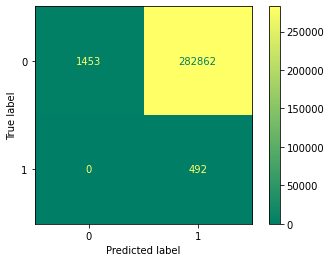

In [ ]:
#Get the classification metrics for the predictions made on the original dataset
xgbm_result_og = accuracy_score(y_og, y_og_pred_xgbm)
print('Accuracy is:', xgbm_result_og*100)
print(classification_report(y_og, y_og_pred_xgbm))
print('Precision is:', precision_score(y_og, y_og_pred_xgbm))
print('Recall is:', recall_score(y_og, y_og_pred_xgbm))
# print(confusion_matrix(y_og, y_og_pred_xgbm, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_og, y_og_pred_xgbm, cmap='summer')

In [ ]:
from sklearn.metrics import average_precision_score
y_og_pred_probs = xgbm.predict_proba(X_og_sc)
auprc = average_precision_score(y_og, y_og_pred_probs[:,1])
print('AUPRC =', auprc)

#It is better to use AUPRC instead of confusion matrix/accuracy for a highly imbalanced dataset that has very little positive-class data. It does not consider anything in the true negative 
#classes and thus focuses on the positive class of the dataset only. 

AUPRC = 0.24111324742020152


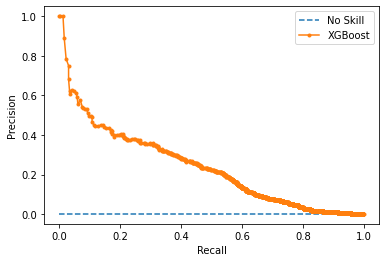

In [ ]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_og[y_og==1]) / len(y_og)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_og, y_og_pred_probs[:,1])
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#This shows a more realistic overview of the model, which has poor precision.

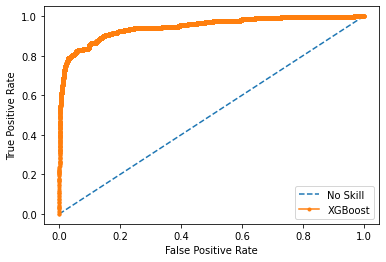

In [ ]:
from sklearn.metrics import roc_curve
pos_probs = y_og_pred_probs[:,1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_og, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#The ROC curve is misleading, as the dataset is highly imbalanced. This is to demonstrate why PR-AUC is used instead of ROC.

### Conclusions
We can see from the results of the model when it uses the real credit card fraud dataset, that while it does manage to get the 492 fraudulent transactions classified as fraud (recall = 1), it ends up also classifying most of the real transactions as fraud too (precision = 0.001). This high false positive rate ends up reducing the overall accuracy as well as the area under precision-recall curve (AUPRC). 

The model works quite well for its own training and testing dataset, giving an accuracy of almost 96-97% consistently across 10 cross-validation folds. However, it does not seem to be generalisable to the real credit card fraud dataset. Further improvement is needed for this model to become better at differentiating between real and fraudulent transactions from the original dataset, as it currently incorrectly flags most of the data as fraudulent. This would be unsuitable for the use case in flagging fraudulent transactions as it would incorrectly alert credit card holders for most of their regular transactions. 


### Further Work
Potential further work for this project could include:
*   Use better computational resources to improve hyperparameter optimisation (e.g. potentially using cloud computing). This would allow the ability to use GridSearch as well instead of only RandomSearch, which is limited as it only tries a few combinations of hyperparamters at random.
*   Use/incorporate original dataset with synthetic dataset to create model. 
  * Use techniques to handle imbalance datasets, such as SMOTE/SMOTEENN and create models using the original dataset.
* Use sklearn Pipeline to test models instead of creating them individually to improve efficiency.

